## Load Needed Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import klib as k

### Import Dataset

In [2]:
data=pd.read_csv('advertising (1).csv')
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


### Checking null values and fill if needed

In [3]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [22]:
data.isnull().mean()*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

## Checking  Outlier

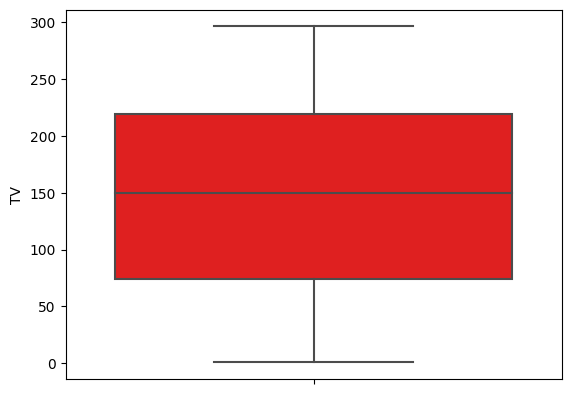

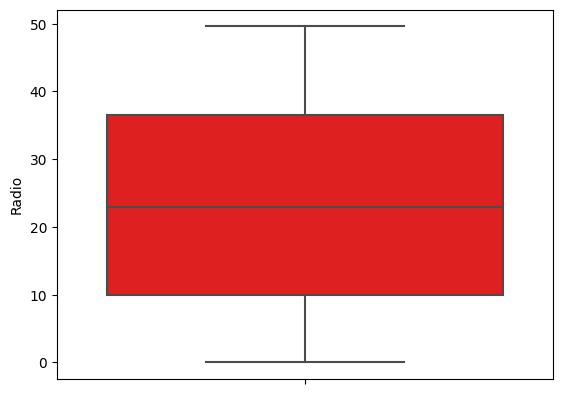

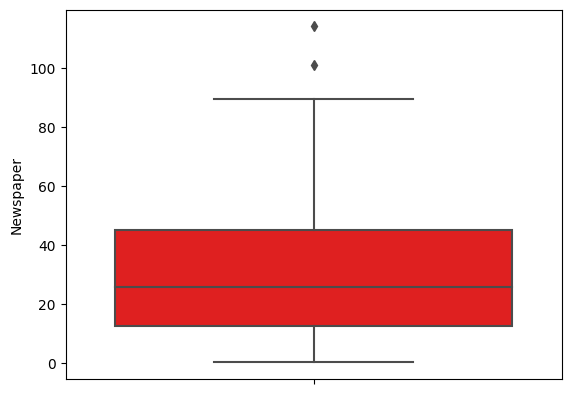

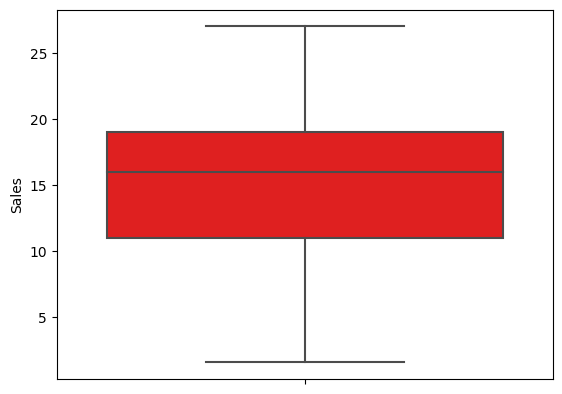

In [4]:
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i], color="red")
        plt.show();

### Setting the outlier limits

In [26]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [29]:
for i in data.columns:
    if data[i].dtypes != "object":
        UL,LL = outlier_limit(data[i])
        data[i] = np.where((data[i]>UL)|(data[i]<LL), np.nan, data[i])

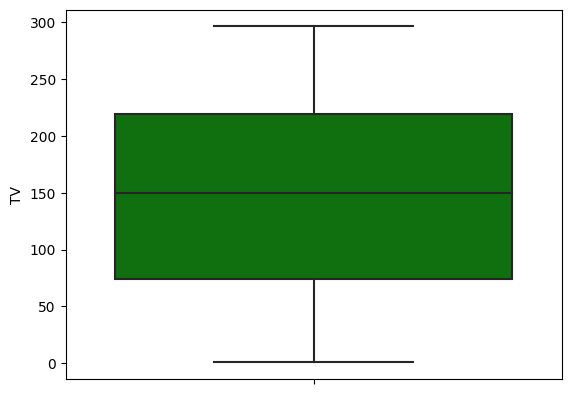

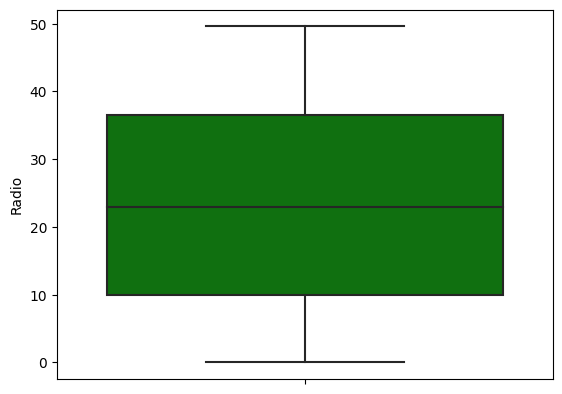

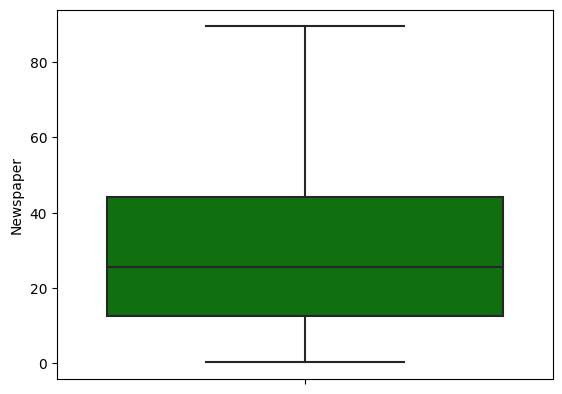

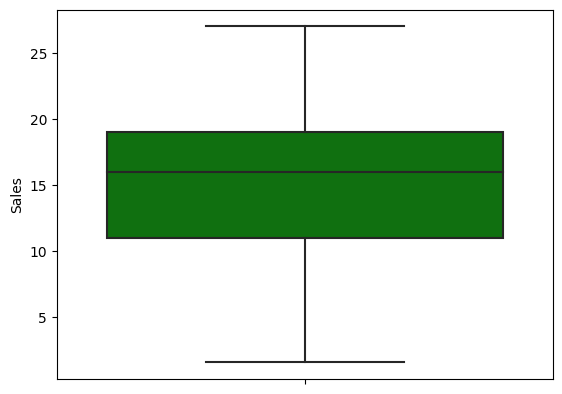

In [31]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.boxplot(y = data[i], color="green")
        plt.show()

#### After outlier setting have to ensure that no more Nan values in the data beacuse if any null values in data will effect model fitting

In [34]:
data.dropna(inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
x=data[['TV','Radio']].values
x

array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9],
       [151.5,  41.3],
       [180.8,  10.8],
       [  8.7,  48.9],
       [ 57.5,  32.8],
       [120.2,  19.6],
       [  8.6,   2.1],
       [199.8,   2.6],
       [ 66.1,   5.8],
       [214.7,  24. ],
       [ 23.8,  35.1],
       [ 97.5,   7.6],
       [204.1,  32.9],
       [195.4,  47.7],
       [ 67.8,  36.6],
       [281.4,  39.6],
       [ 69.2,  20.5],
       [147.3,  23.9],
       [218.4,  27.7],
       [237.4,   5.1],
       [ 13.2,  15.9],
       [228.3,  16.9],
       [ 62.3,  12.6],
       [262.9,   3.5],
       [142.9,  29.3],
       [240.1,  16.7],
       [248.8,  27.1],
       [ 70.6,  16. ],
       [292.9,  28.3],
       [112.9,  17.4],
       [ 97.2,   1.5],
       [265.6,  20. ],
       [ 95.7,   1.4],
       [290.7,   4.1],
       [266.9,  43.8],
       [ 74.7,  49.4],
       [ 43.1,  26.7],
       [228. ,  37.7],
       [202.5,  22.3],
       [177. ,  33.4],
       [293.6,  27.7],
       [206

### Scaling the Data

In [6]:
y=data[['Sales']].values
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.96985227,  0.98152247],
       [-1.19737623,  1.08280781],
       [-1.51615499,  1.52846331],
       [ 0.05204968,  1.21785493],
       [ 0.3941822 , -0.84161366],
       [-1.61540845,  1.73103399],
       [-1.04557682,  0.64390467],
       [-0.31343659, -0.24740632],
       [-1.61657614, -1.42906863],
       [ 0.61604287, -1.39530685],
       [-0.94515567, -1.17923146],
       [ 0.79002835,  0.04969734],
       [-1.4390876 ,  0.79920886],
       [-0.57850171, -1.05768905],
       [ 0.66625345,  0.65065703],
       [ 0.56466461,  1.65000572],
       [-0.92530498,  0.9004942 ],
       [ 1.56887609,  1.10306488],
       [-0.90895735, -0.18663512],
       [ 0.0030068 ,  0.04294498],
       [ 0.8332328 ,  0.29953451],
       [ 1.05509347, -1.22649795],
       [-1.5628625 , -0.4972435 ],
       [ 0.94883389, -0.42971994],
       [-0.98952781, -0.72007125],
       [ 1.35285385, -1.33453565],
       [-0.04837147,  0.40757221],
       [ 1.08662104, -0.44322465],
       [ 1.18820988,

In [7]:
y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11

#### Splitting into training and testing


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## FITTING THE MODEL

In [39]:
model=LinearRegression()

In [40]:
model.fit(x_train,y_train)

LinearRegression()

### Coefficant

In [41]:
model.coef_

array([[4.58981202, 1.6275513 ]])

### Intercept

In [42]:
model.intercept_

array([15.15570892])

### Training Score

In [43]:
training_score=model.score(x_train,y_train)*100
training_score

91.30218535776821

### Testing Score

In [44]:
testing_score=model.score(x_test,y_test)*100
testing_score

86.58755781123509

### R2

In [45]:
R2_score= r2_score(y_test,model.predict(x_test))*100
R2_score

86.58755781123509

### Mean Absloute Error

In [46]:
mae = mean_absolute_error(y_test,model.predict(x_test))
mae

1.4032867136894107

### Mean squared Error

In [47]:
mse = mean_squared_error(y_test,model.predict(x_test))
mse

4.476818366208144

## PREDICTION

In [48]:
y_pred =model.predict(x)
y_pred

array([[21.20462668],
       [11.42230238],
       [10.68449498],
       [17.37672855],
       [15.59516171],
       [10.55863443],
       [11.40469575],
       [13.31442741],
       [ 5.41004584],
       [15.71229643],
       [ 8.89836238],
       [18.86267551],
       [ 9.85132079],
       [10.77905163],
       [19.27266468],
       [20.43288229],
       [12.37433351],
       [24.15184993],
       [10.68000732],
       [15.23940471],
       [19.46759861],
       [18.00220129],
       [ 7.17317454],
       [18.81128685],
       [ 9.44200941],
       [19.19302857],
       [15.59703766],
       [19.42172439],
       [21.03093785],
       [10.2604986 ],
       [23.52634062],
       [12.68141057],
       [10.09259507],
       [21.15105215],
       [10.00121325],
       [20.74889933],
       [23.83629901],
       [14.1508319 ],
       [ 9.9625543 ],
       [21.08108806],
       [18.02199379],
       [17.87519806],
       [23.49791805],
       [16.73022735],
       [ 8.88795212],
       [16

In [49]:
out=pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"),dtype=float)
out.head()

,ACTUAL,PREDICTED
0,22.1,21.204627
1,10.4,11.422302
2,12.0,10.684495
3,16.5,17.376729
4,17.9,15.595162


# VISUALIZATION

### Plot the Linegraph and scatter plot by using ACTUAL AND PREDICTED

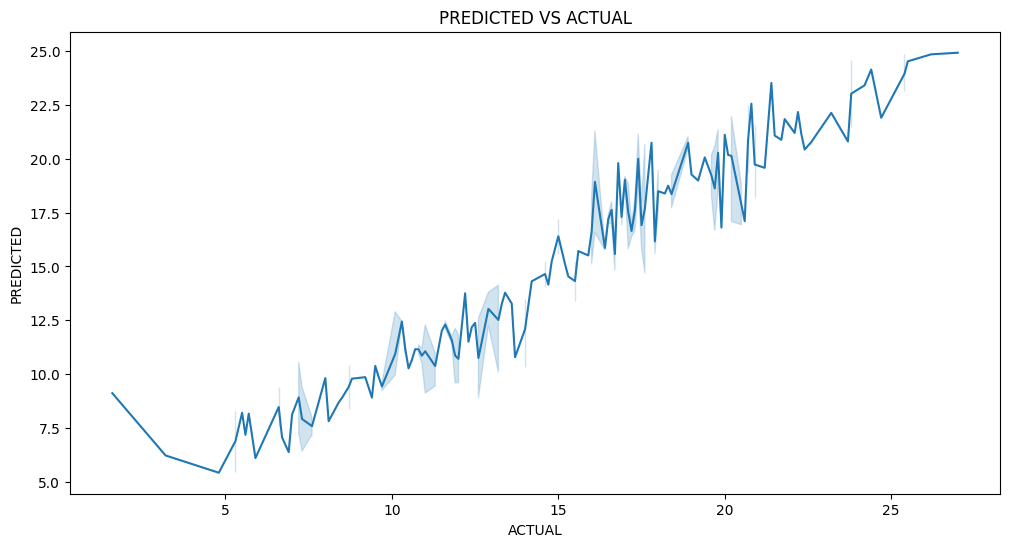

In [50]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL")
sns.lineplot(data=out, x="ACTUAL", y = "PREDICTED");

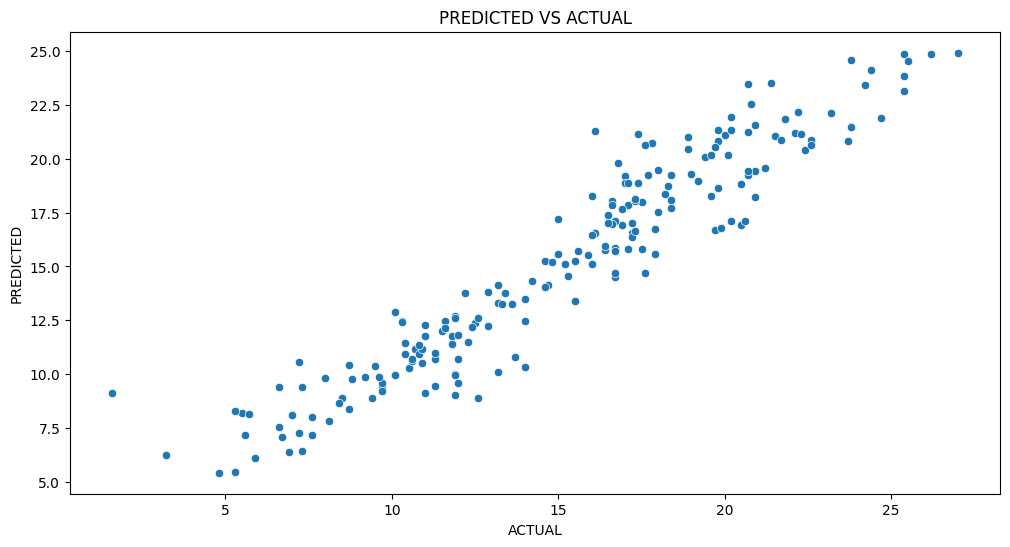

In [21]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL")
sns.scatterplot(data=out, x="ACTUAL", y = "PREDICTED");